@[toc](xxx)

#### 前言：

   **本次使用XGBoost重点再从调参的角度来提高模型的效果，特征工程没有提及，特征工程相关的项目请查看其他的案例，比如：SVM-天气预报**

XGBoost有2种Python接口风格。一种是XGBoost自带的原生Python API接口，另一种是sklearn风格的API接口，两者的实现是基本一样的，仅仅有细微的API使用的不同，主要体现在参数命名上，以及数据集的初始化上面。

在这篇当中我们先使用sklearn风格的API接口，下一篇当中开始使用XGBoost自带的原生Python API接口。



### 1.导入需要的库，模块以及数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score , train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#波士顿数据集非常简单，但它所涉及到的问题却很多
data = load_boston()

In [3]:
X = data.data
y = data.target

In [4]:
X.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
X.mean()

70.07396704469443

In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=42)

### 2.使用默认参数建模，查看接口和属性

In [8]:
#首先尝试使用默认参数来训练查看效果
reg = XGBRegressor().fit(Xtrain,Ytrain)

In [9]:
reg.score(Xtest,Ytest) #R^2评估指标

0.8760095385840321

In [10]:
#查看Y的平均值
y.mean()

22.532806324110677

In [11]:
#可以看出均方误差是平均值y.mean()的1/2左右，结果一般
mean_squared_error(Ytest,reg.predict(Xtest))

9.238913100991956

In [12]:
#查看MAE的值
mean_absolute_error(Ytest,reg.predict(Xtest))

2.0913459162963064

In [13]:
 #树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择
#xgboost可以使用嵌入法进行特征选择
reg.feature_importances_

array([0.01608741, 0.00313967, 0.01446396, 0.00320105, 0.01002821,
       0.19327447, 0.01416495, 0.05734036, 0.00761811, 0.02587119,
       0.06298784, 0.00853149, 0.58329135], dtype=float32)

In [14]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
feature_important = dict(zip(data.feature_names,reg.feature_importances_))

In [16]:
feature_important

{'CRIM': 0.016087415,
 'ZN': 0.0031396674,
 'INDUS': 0.0144639565,
 'CHAS': 0.003201049,
 'NOX': 0.010028212,
 'RM': 0.19327447,
 'AGE': 0.014164945,
 'DIS': 0.057340357,
 'RAD': 0.0076181064,
 'TAX': 0.025871191,
 'PTRATIO': 0.06298784,
 'B': 0.008531487,
 'LSTAT': 0.58329135}

In [17]:
sorted(feature_important.items(),key=lambda x:x[1],reverse=True)

[('LSTAT', 0.58329135),
 ('RM', 0.19327447),
 ('PTRATIO', 0.06298784),
 ('DIS', 0.057340357),
 ('TAX', 0.025871191),
 ('CRIM', 0.016087415),
 ('INDUS', 0.0144639565),
 ('AGE', 0.014164945),
 ('NOX', 0.010028212),
 ('B', 0.008531487),
 ('RAD', 0.0076181064),
 ('CHAS', 0.003201049),
 ('ZN', 0.0031396674)]

### 3.交叉验证，与线性回归&随机森林回归进行对比

In [18]:
reg = XGBRegressor() #交叉验证中导入的没有经过训练的模型

In [19]:
cross_val_score(reg,Xtrain,Ytrain,cv=5).mean()
#这里应该返回什么模型评估指标，还记得么？ 返回的是与reg.score相同的评估指标R^2（回归），准确率（分类）

0.8224925637090423

In [20]:
cross_val_score(reg,Xtrain,Ytrain,cv=5).mean()

0.8224925637090423

In [21]:
# #来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [22]:
#使用随机森林和线性回归进行一个对比
rfr = RandomForestRegressor()
cross_val_score(rfr,Xtrain,Ytrain,cv=5).mean()

0.8125501398475317

In [23]:
lr = LinearRegression()
cross_val_score(lr,Xtrain,Ytrain,cv=5).mean()

0.6879825316957147

|模型|$R^2$|
|--|--|
|XGBRegressor|0.82249|
|RandomForestRegressor|0.81028|
|LinearRegression()|0.68798|



### 4. 定义绘制以训练样本数为横坐标的学习曲线

In [24]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=42
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-',color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-',color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [25]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

In [26]:
cv

KFold(n_splits=5, random_state=42, shuffle=True)

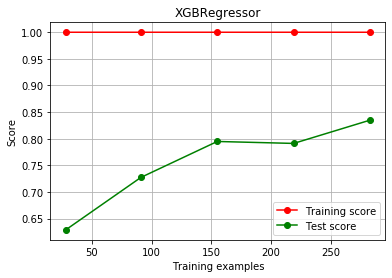

In [27]:
plot_learning_curve(estimator=XGBRegressor(),title="XGBRegressor",X=Xtrain,y=Ytrain,cv=cv,n_jobs=-1)
plt.show()

训练集上的表现展示了模型的学习能力，测试集上的表现展示了模型的泛化能力，通常模型在测试集上的表现不太可能超过训练集，因此我们希望我们的测试集的学习曲线能够努力逼近我们的训练集的学习曲线。

从上面的学习曲线也可以看出，模型在训练集上的变现非常好，但是在测试集上模型的表现能力一般，模型泛化能力不足，模型过拟合。

### 5. 使用参数学习曲线观察n_estimators对模型的影响


150 0.8296584978449107


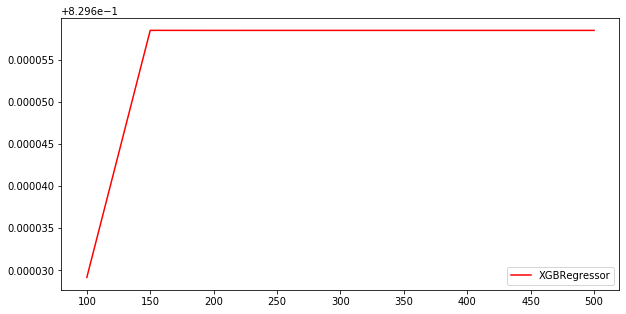

In [28]:
axisx = np.arange(100,501,50)
rs = []
for i in axisx:
    reg = XGBRegressor(n_estimators=i,random_state=42)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(10,5))
plt.plot(axisx,rs,c="red",label="XGBRegressor")
plt.legend()
plt.show()

In [29]:
#验证模型效果是否提高了？
XGBRegressor(n_estimators=150,random_state=42).fit(Xtrain,Ytrain).score(Xtest,Ytest)

0.875990048283188

从这个过程中观察n_estimators参数对模型的影响，我们可以得出以下结论：
<ul>
<p><li>首先，XGB中的树的数量决定了模型的学习能力，树的数量越多，模型的学习能力越强。只要XGB中树的数量足够了，即便只有很少的数据， 模型也能够学到训练数据100%的信息，所以XGB也是天生过拟合的模型。但在这种情况下，模型会变得非常不稳定。</li></p>
    
    
<p><li>第二，XGB中树的数量很少的时候，对模型的影响较大，当树的数量已经很多的时候，对模型的影响比较小，只能有微弱的变化。当数据本身就处于过拟合的时候，再使用过多的树能达到的效果甚微，反而浪费计算资源。当唯一指标或者准确率给出的n_estimators看起来不太可靠的时候，我们可以改造学习曲线来帮助我们。</p>
    
    
<p><li>第三，树的数量提升对模型的影响有极限，最开始，模型的表现会随着XGB的树的数量一起提升，但到达某个点之后，树的数量越多，模型的效果会逐步下降，这也说明了暴力增加n_estimators不一定有效果。</p>
    
    
    
<p><li>这些都和随机森林中的参数n_estimators表现出一致的状态。在随机森林中我们总是先调整n_estimators，当n_estimators的极限已达到，我们才考虑其他参数，但XGB中的状况明显更加复杂，当数据集不太寻常的时候会更加复杂。这是我们要给出的第一个超参数，因此还是建议优先调整n_estimators，一般都不会建议一个太大的数目，300以下为佳。</p>
</ul>




### 6.有放回随机抽样：重要参数subsample

确认了有多少棵树以后，模型在测试集上的得分提高了但是还是存在过拟合，所以就要思考一个问题：如何提高模型的整体效果？

我们每次在训练之前，必然都会有一个庞大的数据集，我们知道几乎所有树模型天生都是过拟合的模型，xgboost也不例外。此外，每次训练数据量过大还会造成树模型的计算缓慢问题，因此。我们要多原始数据的训练数据下手，采取有放回抽样（bootstrap）来防止或减小过拟合。


有放回的抽样每次只能抽取一个样本，若我们需要总共N个样本，就需要抽取N次。每次抽取一个样本的过程是独立的，这一次被抽到的样本会被放回数据集中，下一次还可能被抽到，因此抽出的数据集中，可能有一些重复的数据。


在无论是装袋还是提升的集成算法中，有放回抽样都是我们防止过拟合，让单一弱分类器变得更轻量的必要操作。实际应用中，每次抽取50%左右的数据就能够有不错的效果了。sklearn的随机森林类中也有名为boostrap的参数来帮助我们控制这种随机有放回抽样。同时，这样做还可以保证集成算法中的每个弱分类器（每棵树）都是不同的模型，基于不同的数据建立的自然是不同的模型，而集成一系列一模一样的弱分类器是没有意义的。



在梯度提升树中，我们每一次迭代都要建立一棵新的树，因此我们每次迭代中，都要有放回抽取一个新的训练样本。不过，这并不能保证每次建新树后，集成的效果都比之前要好。因此我们规定，在梯度提升树中，**每构建一个评估器，都让模型更加集中于数据集中容易被判错的那些样本。**

1.0 0.8296584978449107


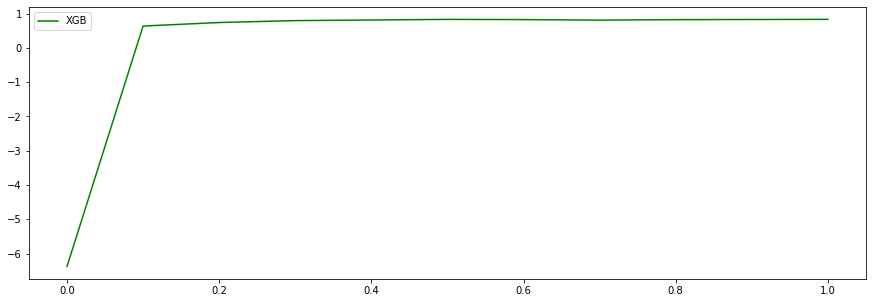

In [30]:
axisx = np.linspace(0,1,11)
rs = []
for i in axisx:
    reg = XGBRegressor(n_estimators=150,subsample=i,random_state=42)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

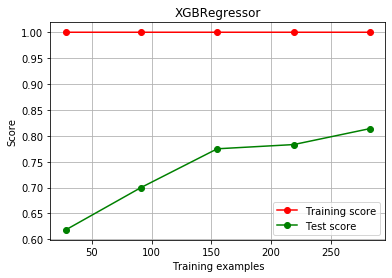

In [31]:
#再次查看学习曲线，看看过拟合现象有没有缓和
plot_learning_curve(estimator=XGBRegressor(n_estimators=150,subsample=0.5,random_state=42),
                    title="XGBRegressor",X=Xtrain,y=Ytrain,cv=cv,n_jobs=-1)
plt.show()

In [32]:
#验证模型效果是否提高了？
XGBRegressor(n_estimators=150,random_state=42,subsample=0.5).fit(Xtrain,Ytrain).score(Xtest,Ytest)

0.8491325728865837

In [33]:
#验证模型效果是否提高了？
XGBRegressor(n_estimators=150,random_state=42,subsample=1.0).fit(Xtrain,Ytrain).score(Xtest,Ytest)

0.875990048283188

采样还对模型造成了什么样的影响呢？采样会减少样本数量，而从学习曲线来看样本数量越少模型的过拟合会越严重，因为对模型来说，数据量越少模型学习越容易，学到的规则也会越具体越
不适用于测试样本。所以subsample参数通常是在样本量本身很大的时候来调整和使用。


我们的模型现在正处于样本量过少并且过拟合的状态，根据学习曲线展现出来的规律，我们的训练样本量在200左右的时候，模型的效果有可能反而比更多训练数据的时候好，但这不代表模型的泛化能力在更小的训练样本量下会更强。**正常来说样本量越大，模型才不容易过拟合，现在展现出来的效果，是由于我们的样本量太小造成的一个巧合**。


从这个角度来看，我们的`subsample`参数的效果在我们的预料之中，总体来说这个参数并没有对波士顿房价数据集上的结果造成太大的影响，由于我们的数据集过少，降低抽样的比例反而让数据的效果更低，不如就让它保持默认。

### 7.迭代决策树：重要参数eta

**(从这里开始直接使用测试集来查看效果)**

eta是迭代决策树时的步长（shrinkage），又叫做学习率（learning rate）。和逻辑回归中的alpha类似，eta越大，迭代的速度越快，算法的极限很快被达到，有可能无法收敛到真正的最佳。eta越小，越有可能找到更精确的最佳值，更多的空间被留给了后面建立的树，但迭代速度会比较缓慢。集成中的学习率，又称为步长以控制迭代速率，常用于防止过拟合。

0.4 0.8827882779387902


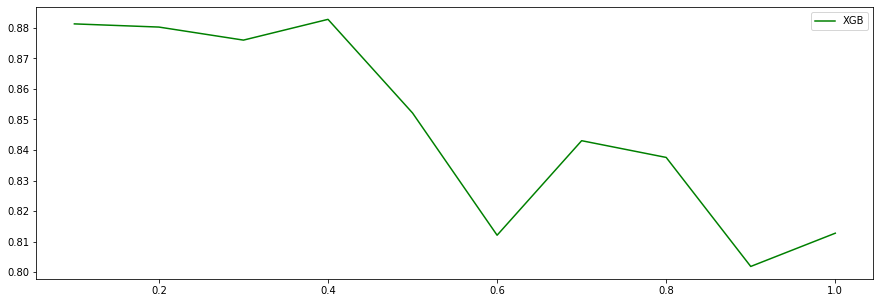

In [34]:
num=[]
rs=[]
for i in np.linspace(0.1,1,10):
    reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.07 0.8900124250540113


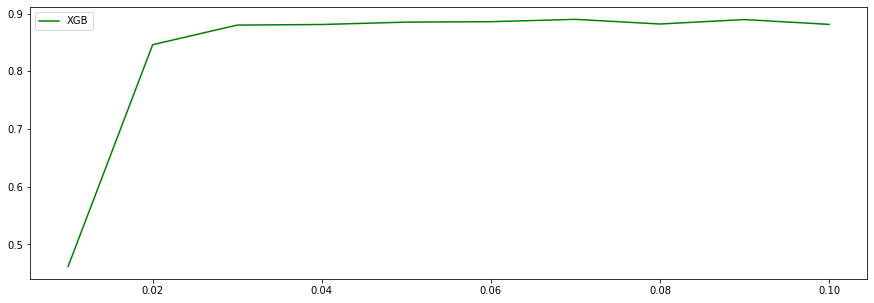

In [35]:
num=[]
rs=[]
for i in np.linspace(0.01,0.1,10):
    reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

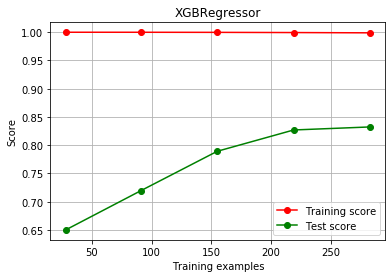

In [36]:
#再次查看学习曲线，看看过拟合现象有没有缓和
plot_learning_curve(estimator=XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07),
                    title="XGBRegressor",X=Xtrain,y=Ytrain,cv=cv,n_jobs=-1)
plt.show()

虽然从图上来说，默认的0.1看起来是一个比较理想的情况，并且看起来更小的步长更利于现在的数据，但我们也无法确定对于其他数据会有怎么样的效果。所以通常，我们不调整，即便调整，一般它也会在[0.01,0.2]之间变动。如果我们希望模型的效果更好，更多的可能是从树本身的角度来说，对树进行剪枝，而不会寄希望于调整。

### 8.选择弱评估器：重要参数booster

梯度提升算法中不只有梯度提升树，XGB作为梯度提升算法的进化，自然也不只有树模型一种弱评估器。在XGB中，除了树模型，我们还可以选用线性模型，比如线性回归，来进行集成。虽然主流的XGB依然是树模型，但我们也可以使用其他的模型。基于XGB的这种性质，我们有参数“booster"来控制我们究竟使用怎样的弱评估器。

如果不想使用树模型，则可以自行调整。当XGB使用线性模型的时候，它的许多数学过程就与使用普通的Boosting集成非常相似，因此我们在讲解中会重点来讲解使用更多，也更加核心的基于树模型的XGBoost。简单看看现有的数据集上，是什么样的弱评估器表现更好：


gbtree
0.8900124250540113
gblinear
0.5258115251365795


No handles with labels found to put in legend.


dart
0.8900124273906196


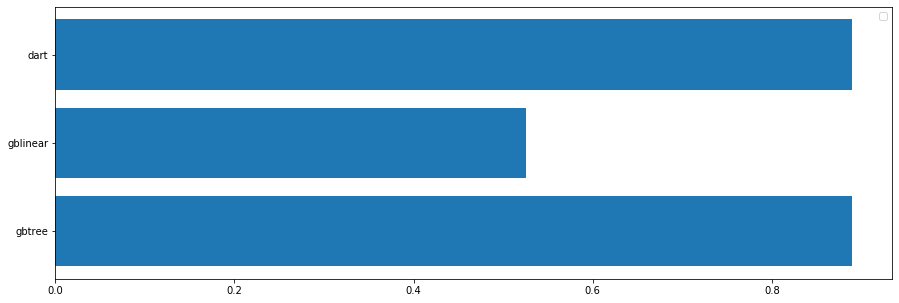

In [37]:
booster=["gbtree","gblinear","dart"]
rs=[]
for i in booster:
    reg = XGBRegressor(n_estimators=150,learning_rate=0.07,random_state=42,booster=i).fit(Xtrain,Ytrain)
    print(i)
    print(reg.score(Xtest,Ytest))
    rs.append(reg.score(Xtest,Ytest))
plt.figure(figsize=(15,5))
plt.barh(booster,rs)
plt.legend()
plt.show() 

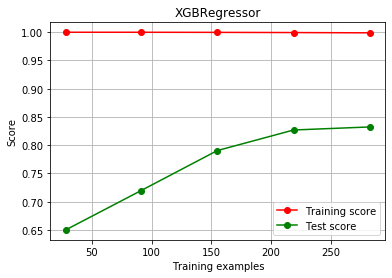

In [38]:
#再次查看学习曲线，看看过拟合现象有没有缓和
plot_learning_curve(estimator=XGBRegressor(n_estimators=150,random_state=42,
                                           learning_rate=0.07,booster="dart"),
                    title="XGBRegressor",X=Xtrain,y=Ytrain,cv=cv,n_jobs=-1)
plt.show()

从上面可以看出‘gbtree’和‘dart’效果差不多

### 9.XGB的目标函数：重要参数objective

梯度提升算法中都存在着损失函数。不同于逻辑回归和SVM等算法中固定的损失函数写法，集成算法中的损失函数是可选的，要选用什么损失函数取决于我们希望解决什么问题，以及希望使用怎样的模型。比如说，如果我们的目标是进行回归预测，那我们可以选择调节后的均方误差RMSE作为我们的损失函数。如果我们是进行分类预测，那我们可以选择错误率error或者对数损失log_loss。只要我们选出的函数是一个可微的，能够代表某种损失的函数，它就可以是我们XGB中的损失函数。


在众多机器学习算法中，损失函数的核心是衡量模型的泛化能力，即模型在未知数据上的预测的准确与否，我们训练模型的核心目标也是希望模型能够预测准确。在XGB中，预测准确自然是非常重要的因素，但我们之前提到过，XGB的是实现了模型表现和运算速度的平衡的算法。普通的损失函数，比如错误率，均方误差等，都只能够衡量模型的表现，无法衡量模型的运算速度。回忆一下，我们曾在许多模型中使用空间复杂度和时间复杂度来衡量模型的运算效率。XGB因此引入了模型复杂度来衡量算法的运算效率。因此XGB的目标函数被写作：传统损失函数 + 模型复杂度。

**这里我们分别使用sklearn中的xgboost和xgboost库本身来相比较一下，看看这两个库之间有没有什么区别**

In [39]:
#验证模型效果是否提高了？
reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.8900124250540113

In [40]:
mean_squared_error(Ytest,reg.predict(Xtest))

8.195514683228383

**xgboost库本身**

In [41]:
#xgb实现法
import xgboost as xgb

In [42]:
#使用类DMatrix读取数据
dtrain = xgb.DMatrix(Xtrain,Ytrain) #特征矩阵和标签都进行一个传入
dtest = xgb.DMatrix(Xtest,Ytest)

In [43]:
#非常遗憾无法打开来查看，所以通常都是先读到pandas里面查看之后再放到DMatrix中
dtrain

In [44]:
#写明参数
param = {'silent':True ,'objective':'reg:linear',"eta":0.07}
num_round = 150 #n_estimators

In [45]:
#类train，可以直接导入的参数是训练数据，树的数量，其他参数都需要通过params来导入
xgbst = xgb.train(param, dtrain, num_round)

In [46]:
#接口predict
preds = xgbst.predict(dtest)

In [47]:
from sklearn.metrics import r2_score
r2_score(Ytest,preds)

0.8900124250540115

In [48]:
mean_squared_error(Ytest,preds)

8.195514683228383

可以看出，虽然两个API不相同，里面的参数名称也不尽相同，但是两者最后的结果来看，差别并不明显，在实际使用过程中主要还是看个人喜好，觉得哪个好用，那个用着方便就用那个。

### 10.参数alpha，lambda


在普通的梯度提升树GBDT中，我们是不在目标函数中使用正则项的。但XGB借用正则项来修正树模型天生容易过拟合这个缺陷，在剪枝之前让模型能够尽量不过拟合。

||||
|--|--|--|
参数含义|xgb.train()| xgb.XGBRegressor()
L1正则项的参数|alpha，默认0，取值范围[0, +∞] |reg_alpha，默认0，取值范围[0, +∞]
L2正则项的参数|lambda，默认1，取值范围[0, +∞]|reg_lambda，默认1，取值范围[0, +∞]




根据我们以往的经验，我们往往认为两种正则化达到的效果是相似的，只不过细节不同。比如在逻辑回归当中，两种正则化都会压缩参数的大小，只不过L1正则化会让为0，而L2正则化不会。在XGB中也是如此。**当lambda和alpha越大，惩罚越重，正则项所占的比例就越大**，在尽全力最小化目标函数的最优化方向下，叶子节点数量就会被压制，模型的复杂度就越来越低，所以对于天生过拟合的XGB来说，**正则化可以一定程度上提升模型效果**。


对于两种正则化如何选择的问题，**从XGB的默认参数来看，我们优先选择的是L2正则化**。当然，如果想尝试L1也不是不可。两种正则项还可以交互，因此这两个参数的使用其实比较复杂。在实际应用中，正则化参数往往不是我们调参的最优选择，如果真的希望控制模型复杂度，我们会调整而不是调整这两个正则化参数，因此大家不必过于在意这两个参数最终如何影响了我们的模型效果。对于树模型来说，还是剪枝参数地位更高更优先。大家只需要理解这两个参数从数学层面上如何影响我们的模型就足够了。如果我们希望调整和，我们往往会使用网格搜索来帮助我们。


0.0 0.9016635725400661


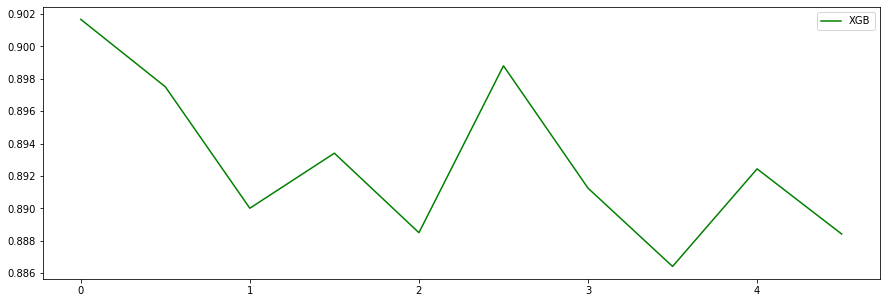

In [49]:
#L2正则项的参数:reg_lambda
num=[]
rs=[]
for i in np.arange(0,5,0.5):
    reg = XGBRegressor(n_estimators=150,random_state=42,
                       learning_rate=0.07,reg_lambda=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.1 0.9075607022532752


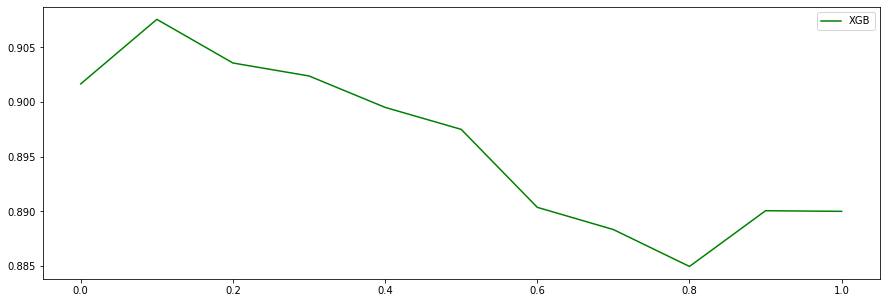

In [50]:
#继续细化L2正则项的参数:reg_lambda
num=[]
rs=[]
for i in np.arange(0,1.1,0.1):
    reg = XGBRegressor(n_estimators=150,random_state=42,
                       learning_rate=0.07,reg_lambda=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.09 0.907880156787876


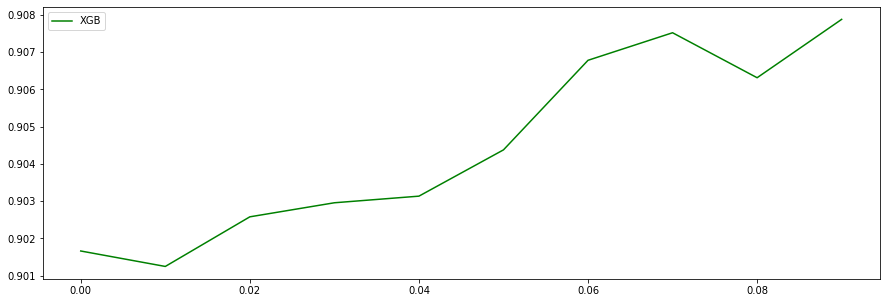

In [51]:
#继续细化L2正则项的参数:reg_lambda
num=[]
rs=[]
for i in np.arange(0,0.1,0.01):
    reg = XGBRegressor(n_estimators=150,random_state=42,
                       learning_rate=0.07,reg_lambda=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

4.0 0.8943898653944237


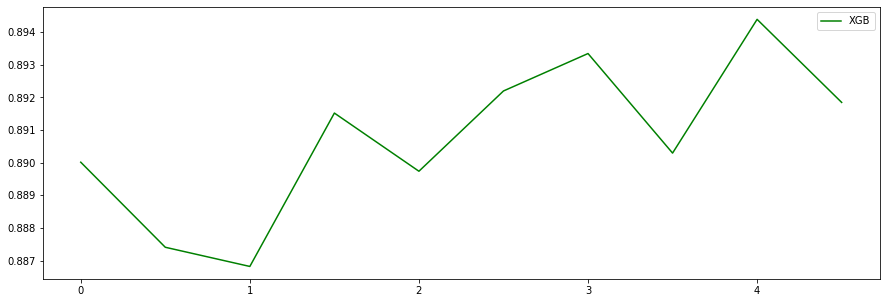

In [52]:
#L1正则项的参数:reg_alpha
num=[]
rs=[]
for i in np.arange(0,5,0.5):
    reg = XGBRegressor(n_estimators=150,random_state=42,
                       learning_rate=0.07,reg_alpha=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

3.9000000000000004 0.8952366759828024


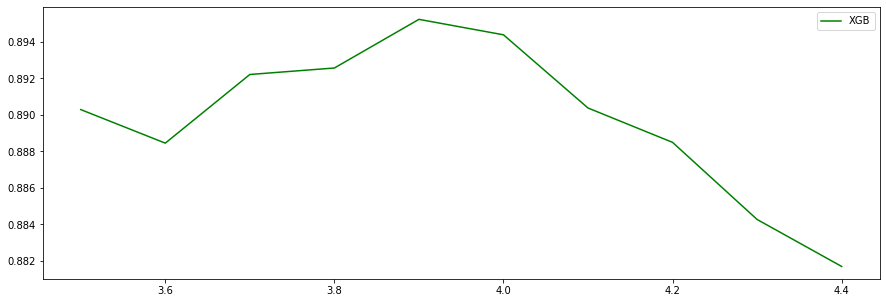

In [53]:
#继续细化L1正则项的参数:reg_alpha
num=[]
rs=[]
for i in np.arange(3.5,4.5,0.1):
    reg = XGBRegressor(n_estimators=150,random_state=42,
                       learning_rate=0.07,reg_alpha=i).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

3.5000000000000004 0.9029205365270191


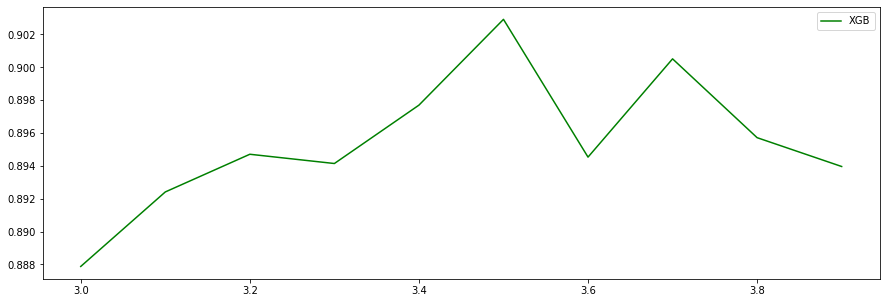

In [54]:
#继续细化L1正则项的参数:reg_alpha
num=[]
rs=[]
for i in np.arange(3,4,0.1):
    reg = XGBRegressor(n_estimators=150,random_state=42,
                       learning_rate=0.07,reg_lambda=0.1,
                       reg_alpha=i,n_jobs=-1).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

In [55]:
#验证模型效果是否提高了？
reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07,
                   reg_lambda=0.1,n_jobs=-1).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.9075607022532752

结果发现，调整L1正则项的参数:reg_alpha并不会在已经调整完L2正则项的参数:reg_lambda的基础上提高得分，反而会降低得分。


这是为什么呢？留给你们自己思考。

### 11.让树停止生长：重要参数gamma


gamma被称之为是“复杂性控制”（complexity control），所以是我们用来**防止过拟合的重要参数**。实践证明， 是对梯度提升树影响最大的参数之一，其效果丝毫不逊色于n_estimators和防止过拟合的神器max_depth。同时，还是我们让树停止生长的重要参数。

我们可以直接通过设定的大小来让XGB中的树停止生长。因此被定义为，在树的叶节点上进行进一步分枝所需的最小目标函数减少量，在决策树和随机森林中也有类似的参（min_split_loss，min_samples_split）。**设定越大，算法就越保守，树的叶子数量就越少，模型的复杂度就越低**。



0.1 0.8170459342636281 0.006074285153486288
0.2 0.816370939182435 0.00568050738275403
0.2 0.816370939182435 0.00568050738275403 0.039400139359495025


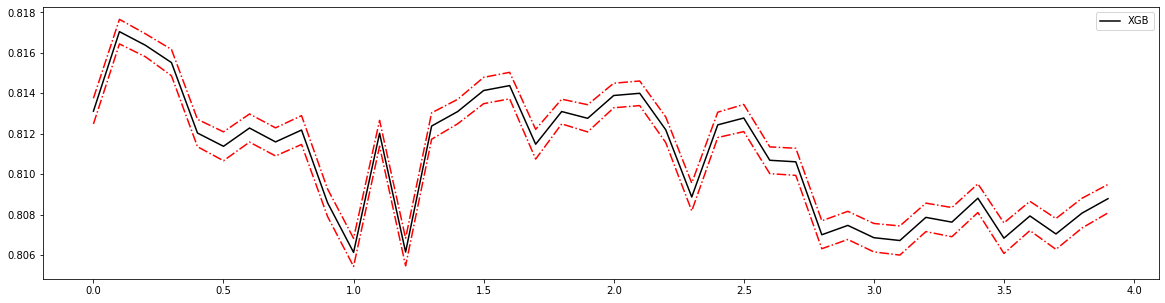

In [56]:
axisx = np.arange(0,4,0.1)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07,
                   reg_lambda=0.1,gamma=i,n_jobs=-1).fit(Xtrain,Ytrain)
    result = cross_val_score(reg,Xtrain,Ytrain,cv=cv)
    rs.append(result.mean())
    var.append(result.var())
    ge.append((1 - result.mean())**2+result.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.08 0.90967361362714


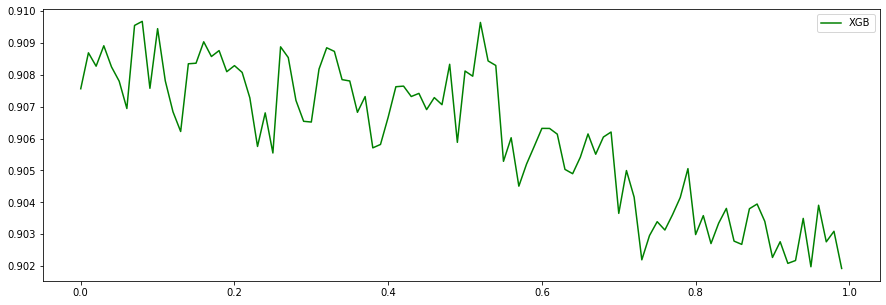

In [57]:
#直接在测试集上
num=[]
rs=[]
for i in np.arange(0,1,0.01):
    reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07,
                   reg_lambda=0.1,gamma=i,n_jobs=-1).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

### 12.树的最大深度:max_depth


作为天生过拟合的模型，XGBoost应用的核心之一就是减轻过拟合带来的影响。作为树模型，减轻过拟合的方式主要是靠对决策树剪枝来降低模型的复杂度，以求降低方差。



这些参数中，树的最大深度(max_depth)是决策树中的剪枝法宝，算是最常用的剪枝参数，不过在XGBoost中，最大深度的功能与参数gamma相似，因此如果先调节了gamma，则最大深度可能无法展示出巨大的效果。当然，如果先调整了最大深度，则gamma也有可能无法显示明显的效果。通常来说，这两个参数中我们只使用一个，不过两个都试试也没有坏处。

7 0.9097678550546746


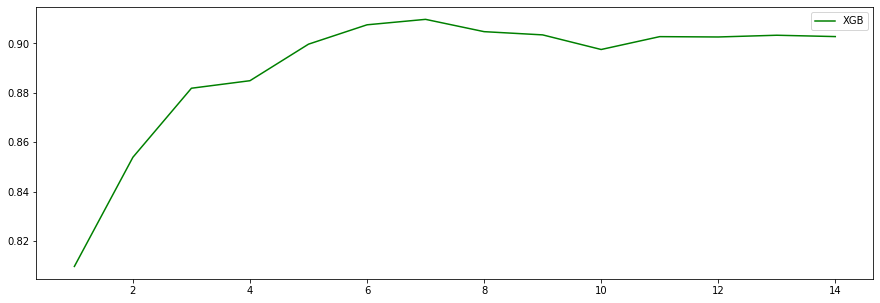

In [58]:
#树的最大深度:max_depth
num=[]
rs=[]
for i in np.arange(1,15,1):
    reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07,
                   reg_lambda=0.1,max_depth=i,n_jobs=-1).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.8300000000000001 0.9124986757360698


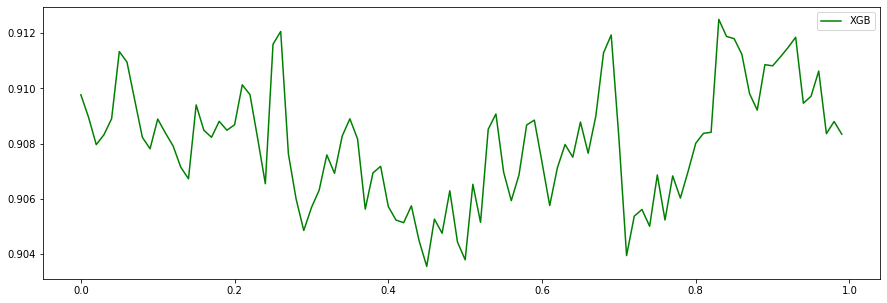

In [59]:
#直接在测试集上
num=[]
rs=[]
for i in np.arange(0,1,0.01):
    reg = XGBRegressor(n_estimators=150,random_state=42,learning_rate=0.07,
                   reg_lambda=0.1,gamma=i,max_depth=7,n_jobs=-1).fit(Xtrain,Ytrain)
    num.append(i)
    rs.append(reg.score(Xtest,Ytest))
print(num[rs.index(max(rs))],max(rs))
plt.figure(figsize=(15,5))
plt.plot(num,rs,c="green",label="XGB")
plt.legend()
plt.show()

可以看到，我们完全无法从中看出什么趋势，偏差时高时低，方差时大时小，参数引起的波动远远超过其他参数（其他参数至少还有一个先上升再平稳的过程，而则是仿佛完全无规律）。在sklearn下XGBoost太不稳定，如果这样来调整参数的话，效果就很难保证。因此，为了调整，我们需要来引入新的工具，xgboost库中的类xgboost.cv。

### 13.其他参数
    colsample_bytree，默认1，每次生成树时随机抽样特征的比例
    
    colsample_bylevel，默认1，每次生成树的一层时随机抽样特征的比例
    
    min_child_weight，默认1，一个叶子节点上所需要的最小即叶子节点上的二阶导数之和类似于样本权重不太常用，它是一篇叶子上的二阶导数之和，当样本所对应的二阶导数很小时，比如说为0.01，min_child_weight若设定为1，则说明一片叶子上至少需要100个样本。本质上来说，这个参数其实是在控制叶子上所需的最小样本量，因此对于样本量很大的数据会比较有效。如果样本量很小（比如我们现在使用的波士顿房价数据集，则这个参数效用不大）。就剪枝的效果来说，这个参数的功能也被替代了一部分，通常来说我们会试试看这个参数，但这个参数不是我的优先选择。


通常当我们获得了一个数据集后，我们先使用网格搜索找出比较合适的n_estimators和eta组合，然后使用gamma或者max_depth观察模型处于什么样的状态（过拟合还是欠拟合，处于方差-偏差图像的左边还是右边？），最后再决定是否要进行剪枝。通常来说，对于XGB模型，大多数时候都是需要剪枝的。接下来我们就来看看使用xgb.cv这个类来进行剪枝调参，以调整出一组泛化能力很强的参数。

### 14.使用sklearn中的XGBRegressor参数总结

In [60]:
#验证模型效果是否提高了？
reg = XGBRegressor(n_estimators=150,
                   random_state=42,
                   learning_rate=0.07,
                   reg_lambda=0.1,
                   max_depth=7,
                   gamma=0.83,
                   n_jobs=-1).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.9124986757360698

In [61]:
mean_absolute_error(Ytest,reg.predict(Xtest))

1.8553097781382109

In [62]:
mean_squared_error(Ytest,reg.predict(Xtest))

6.519994537193154

|回归模型|$R^2$|
|--|--|
|RandomForestRegressor|0.81028|
|LinearRegression()|0.68798|
|XGBRegressor(before)|0.82249|
|XGBRegressor(after)|0.912500|